In [116]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR

In [124]:
# pre-processor
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))])

# load the data
train_dataset = datasets.MNIST(
    'data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(
    'data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32)

In [125]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=(28, 28), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

In [126]:
# Build a model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(9216,1024)
        self.fc = nn.Linear(1024, 10)
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = self.fc(x)
        output = F.log_softmax(x, dim=1)
        return output
net = CNNModel()

# compiling
optimizer = optim.SGD(net.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()  

In [127]:
net

CNNModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=9216, out_features=1024, bias=True)
  (fc): Linear(in_features=1024, out_features=10, bias=True)
)

In [128]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(5 + 1)]

In [129]:
def train(epoch):
  net.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = net(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
  train_losses.append(loss.item())

In [130]:
def test():
  net.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = net(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [ ]:
test()
for epoch in range(1,6):
  train(epoch)
  test()

d:\insurance samadhan\bitbucket_1\insa\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3024, Accuracy: 1226/10000 (12%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.293878
Train Epoch: 1 [320/60000 (1%)]	Loss: 2.052169
Train Epoch: 1 [640/60000 (1%)]	Loss: 1.806566
Train Epoch: 1 [960/60000 (2%)]	Loss: 1.313756
Train Epoch: 1 [1280/60000 (2%)]	Loss: 1.103228
Train Epoch: 1 [1600/60000 (3%)]	Loss: 0.671311
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.616316
Train Epoch: 1 [2240/60000 (4%)]	Loss: 0.432636
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.354835
Train Epoch: 1 [2880/60000 (5%)]	Loss: 0.464557
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.546975
Train Epoch: 1 [3520/60000 (6%)]	Loss: 0.744196
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.315751
Train Epoch: 1 [4160/60000 (7%)]	Loss: 0.632240
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.596612
Train Epoch: 1 [4800/60000 (8%)]	Loss: 0.513992
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.467193
Train Epoch: 1 [5440/60000 (9%)]	Loss: 0.213642
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.396474
Train Epoch: 1 [6080/60000 (10%)]	L

Train Epoch: 1 [52480/60000 (87%)]	Loss: 0.068547
Train Epoch: 1 [52800/60000 (88%)]	Loss: 0.392960
Train Epoch: 1 [53120/60000 (89%)]	Loss: 0.117428
Train Epoch: 1 [53440/60000 (89%)]	Loss: 0.077674
Train Epoch: 1 [53760/60000 (90%)]	Loss: 0.047044
Train Epoch: 1 [54080/60000 (90%)]	Loss: 0.211490
Train Epoch: 1 [54400/60000 (91%)]	Loss: 0.095174
Train Epoch: 1 [54720/60000 (91%)]	Loss: 0.037217
Train Epoch: 1 [55040/60000 (92%)]	Loss: 0.230941
Train Epoch: 1 [55360/60000 (92%)]	Loss: 0.057438
Train Epoch: 1 [55680/60000 (93%)]	Loss: 0.021754
Train Epoch: 1 [56000/60000 (93%)]	Loss: 0.131366
Train Epoch: 1 [56320/60000 (94%)]	Loss: 0.062975
Train Epoch: 1 [56640/60000 (94%)]	Loss: 0.232293
Train Epoch: 1 [56960/60000 (95%)]	Loss: 0.044032
Train Epoch: 1 [57280/60000 (95%)]	Loss: 0.169050
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.276832
Train Epoch: 1 [57920/60000 (97%)]	Loss: 0.029498
Train Epoch: 1 [58240/60000 (97%)]	Loss: 0.094285
Train Epoch: 1 [58560/60000 (98%)]	Loss: 0.024439


Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.053322
Train Epoch: 2 [45120/60000 (75%)]	Loss: 0.212021
Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.156997
Train Epoch: 2 [45760/60000 (76%)]	Loss: 0.157631
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.175242
Train Epoch: 2 [46400/60000 (77%)]	Loss: 0.252341
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.311547
Train Epoch: 2 [47040/60000 (78%)]	Loss: 0.034138
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.130706
Train Epoch: 2 [47680/60000 (79%)]	Loss: 0.136877
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.100738
Train Epoch: 2 [48320/60000 (81%)]	Loss: 0.085876
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.097648
Train Epoch: 2 [48960/60000 (82%)]	Loss: 0.268376
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.054796
Train Epoch: 2 [49600/60000 (83%)]	Loss: 0.091033
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.060179
Train Epoch: 2 [50240/60000 (84%)]	Loss: 0.167397
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.061634
Train Epoch: 2 [50880/60000 (85%)]	Loss: 0.105613


Train Epoch: 3 [37120/60000 (62%)]	Loss: 0.053162
Train Epoch: 3 [37440/60000 (62%)]	Loss: 0.159939
Train Epoch: 3 [37760/60000 (63%)]	Loss: 0.015529
Train Epoch: 3 [38080/60000 (63%)]	Loss: 0.017121
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.240335
Train Epoch: 3 [38720/60000 (65%)]	Loss: 0.011171
Train Epoch: 3 [39040/60000 (65%)]	Loss: 0.007649
Train Epoch: 3 [39360/60000 (66%)]	Loss: 0.167677
Train Epoch: 3 [39680/60000 (66%)]	Loss: 0.067669
Train Epoch: 3 [40000/60000 (67%)]	Loss: 0.028700
Train Epoch: 3 [40320/60000 (67%)]	Loss: 0.003937
Train Epoch: 3 [40640/60000 (68%)]	Loss: 0.070722
Train Epoch: 3 [40960/60000 (68%)]	Loss: 0.156928
Train Epoch: 3 [41280/60000 (69%)]	Loss: 0.146165
Train Epoch: 3 [41600/60000 (69%)]	Loss: 0.065607
Train Epoch: 3 [41920/60000 (70%)]	Loss: 0.036066
Train Epoch: 3 [42240/60000 (70%)]	Loss: 0.011458
Train Epoch: 3 [42560/60000 (71%)]	Loss: 0.195828
Train Epoch: 3 [42880/60000 (71%)]	Loss: 0.070961
Train Epoch: 3 [43200/60000 (72%)]	Loss: 0.107128


Train Epoch: 4 [29440/60000 (49%)]	Loss: 0.048028
Train Epoch: 4 [29760/60000 (50%)]	Loss: 0.019398
Train Epoch: 4 [30080/60000 (50%)]	Loss: 0.022503
Train Epoch: 4 [30400/60000 (51%)]	Loss: 0.012752
Train Epoch: 4 [30720/60000 (51%)]	Loss: 0.049840
Train Epoch: 4 [31040/60000 (52%)]	Loss: 0.026621
Train Epoch: 4 [31360/60000 (52%)]	Loss: 0.053706
Train Epoch: 4 [31680/60000 (53%)]	Loss: 0.121222
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.109062
Train Epoch: 4 [32320/60000 (54%)]	Loss: 0.283868
Train Epoch: 4 [32640/60000 (54%)]	Loss: 0.115008
Train Epoch: 4 [32960/60000 (55%)]	Loss: 0.001364
Train Epoch: 4 [33280/60000 (55%)]	Loss: 0.039753
Train Epoch: 4 [33600/60000 (56%)]	Loss: 0.043001
Train Epoch: 4 [33920/60000 (57%)]	Loss: 0.006666
Train Epoch: 4 [34240/60000 (57%)]	Loss: 0.043905
Train Epoch: 4 [34560/60000 (58%)]	Loss: 0.019207
Train Epoch: 4 [34880/60000 (58%)]	Loss: 0.028926
Train Epoch: 4 [35200/60000 (59%)]	Loss: 0.040089
Train Epoch: 4 [35520/60000 (59%)]	Loss: 0.006695


Train Epoch: 5 [21760/60000 (36%)]	Loss: 0.019168
Train Epoch: 5 [22080/60000 (37%)]	Loss: 0.010085
Train Epoch: 5 [22400/60000 (37%)]	Loss: 0.006452
Train Epoch: 5 [22720/60000 (38%)]	Loss: 0.023336
Train Epoch: 5 [23040/60000 (38%)]	Loss: 0.007156
Train Epoch: 5 [23360/60000 (39%)]	Loss: 0.006397
Train Epoch: 5 [23680/60000 (39%)]	Loss: 0.055909
Train Epoch: 5 [24000/60000 (40%)]	Loss: 0.006296
Train Epoch: 5 [24320/60000 (41%)]	Loss: 0.000536
Train Epoch: 5 [24640/60000 (41%)]	Loss: 0.050213
Train Epoch: 5 [24960/60000 (42%)]	Loss: 0.005750
Train Epoch: 5 [25280/60000 (42%)]	Loss: 0.037243
Train Epoch: 5 [25600/60000 (43%)]	Loss: 0.053035
Train Epoch: 5 [25920/60000 (43%)]	Loss: 0.036904
Train Epoch: 5 [26240/60000 (44%)]	Loss: 0.047018
Train Epoch: 5 [26560/60000 (44%)]	Loss: 0.296227
Train Epoch: 5 [26880/60000 (45%)]	Loss: 0.190468
Train Epoch: 5 [27200/60000 (45%)]	Loss: 0.038520
Train Epoch: 5 [27520/60000 (46%)]	Loss: 0.026333
Train Epoch: 5 [27840/60000 (46%)]	Loss: 0.174411


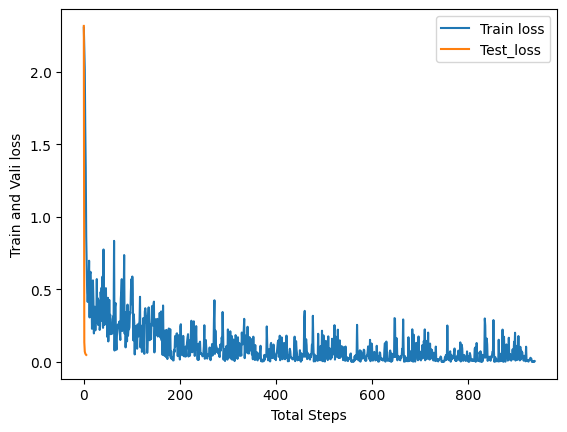

In [118]:
plt.plot(train_losses, label='Train loss')
plt.plot(test_losses, label='Test_loss')
plt.xlabel('Total Steps')
plt.ylabel('Train and Vali loss')
plt.legend()

In [120]:
torch.save(net, 'pytorch.h5')

In [121]:
model = torch.load('pytorch.h5')
model.eval()

CNNModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=9216, out_features=1024, bias=True)
  (fc): Linear(in_features=1024, out_features=10, bias=True)
)